,patient_id,age,gender,drug_group,symptom_score_before,symptom_score_after
,<int>,<int>,<chr>,<chr>,<int>,<int>
1,1,58,Female,Drug B,10,8
2,2,25,Male,Drug A,7,2
3,3,19,Female,Drug A,8,4
4,4,65,Female,Drug A,6,5
5,5,35,Male,Drug B,7,6
6,6,33,Male,Drug B,6,5


# A tibble: 3 × 5
  drug_group avg_before avg_after avg_improvement count
  <chr>           <dbl>     <dbl>           <dbl> <int>
1 Drug A           8         4.67            3.33     9
2 Drug B           8.36      6               2.36    11
3 Drug C           8         4.7             3.3     10



	Paired t-test

data:  drug_a$symptom_score_before and drug_a$symptom_score_after
t = 6.6667, df = 8, p-value = 0.0001581
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 2.180331 4.486335
sample estimates:
mean difference 
       3.333333 


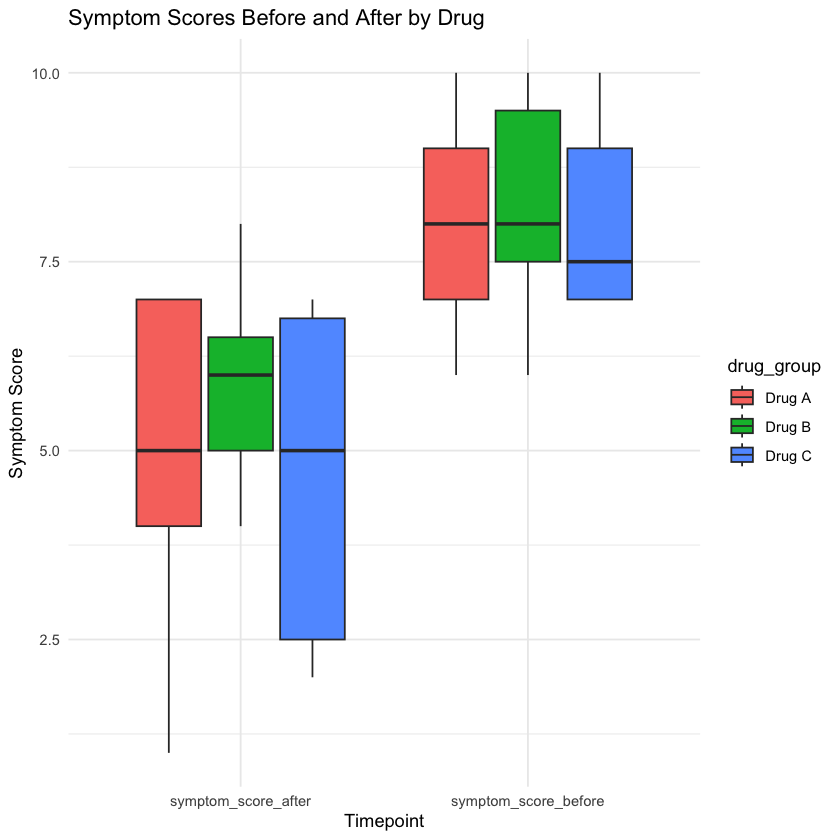

In [25]:
library(tidyverse)

data <- read.csv("DrugEffectivenessAnalysis/drug_effectiveness_data.csv")

head(data)

summary_by_drug <- data %>%
  group_by(drug_group) %>%
  summarise(
    avg_before = mean(symptom_score_before),
    avg_after = mean(symptom_score_after),
    avg_improvement = mean(symptom_score_before - symptom_score_after),
    count = n()
  )

print(summary_by_drug)

data_long <- data %>%
  pivot_longer(cols = c(symptom_score_before, symptom_score_after),
               names_to = "timepoint",
               values_to = "score")

ggplot(data_long, aes(x = timepoint, y = score, fill = drug_group)) +
  geom_boxplot() +
  labs(title = "Symptom Scores Before and After by Drug",
       x = "Timepoint", y = "Symptom Score") +
  theme_minimal()

drug_a <- data %>% filter(drug_group == "Drug A")
t.test(drug_a$symptom_score_before, drug_a$symptom_score_after, paired = TRUE)


In [15]:
getwd()

[1] "/Users/xiomaramejia"

In [17]:
data <- read.csv("DrugEffectivenessAnalysis/drug_effectiveness_data.csv")